# Anomly detection for IoT 

Preprocessed dataset for network based intrusion detection system in Iot Devices. 
Ultrasonic Sensor with Arduino and NodeMCU used to monitor the network and collect the network logs. 
NodeMCU with ESP8266 wifi module was used to send data to the server via wifi.

The normality column can have the following values:
- 0 - Normal
- 1 - Wrong Setup
- 2 - DDOS
- 3 - Data type probing
- 4 - Scan Attack
- 5 - Man in the middle

For more detail, check [here](https://www.kaggle.com/datasets/speedwall10/iot-device-network-logs).


In [92]:
%matplotlib inline
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#plt.style.use('seaborn-v0_8-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['lines.linewidth'] = 2

# Color Blind adjusted colors and markers
colormap=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
markers=['o', '*', '.', 'x', '+', 's', 'd', 'h', 'v']
lines=['-', ':', '--', '-.']

In [53]:
df = pl.read_csv('dataset/IoT-DNL.csv.gz')
#df = df.sample(int(df.shape[0]*0.2))
df.head()

frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64
1,123722736684743,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,49279.0,80.0,-99.0,0
2,123722736773147,62,87971959760497,167275820076079,192168035,1921680121,6.0,48.0,0.0,56521.0,80.0,-99.0,0
3,123722736824792,62,167275820076079,87971959760497,1921680121,192168035,6.0,48.0,0.0,80.0,56521.0,-99.0,0
4,123722736836228,54,167275820076079,87971959760497,1921680121,192168035,6.0,40.0,0.0,80.0,49279.0,-99.0,0
5,123722749684991,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,56521.0,80.0,-99.0,0


In [54]:
df.describe()

statistic,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0,477426.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",52917.357471,1.2566e14,120.658661,1.2941e14,1.6078e14,8.6227e8,1.2069e9,2.858263,97.2428,60.844678,23722.759349,4528.371894,0.564996,2.489808
"""std""",32439.729155,2.0642e12,88.273425,4.4788e13,5.0725e13,2.0198e9,3.6758e9,3.284435,97.168551,87.68277,27906.683645,15426.452846,3188.911857,1.706533
"""min""",1.0,1.2372e14,42.0,3.7560e13,1.1011e12,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-99.0,0.0
"""25%""",27547.0,1.2434e14,42.0,8.7972e13,1.3991e14,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-5.0,1.0
"""50%""",47329.0,1.2491e14,98.0,1.1043e14,1.6728e14,1.92168035e8,1.9217e9,6.0,84.0,0.0,0.0,0.0,-3.0,2.0
"""75%""",78486.0,1.2565e14,176.0,1.6728e14,1.6728e14,1.9217e9,1.9217e9,6.0,162.0,110.0,55068.0,80.0,-2.0,4.0
"""max""",125158.0,1.3051e14,3484.0,2.0707e14,2.8147e14,1.7222e11,2.5526e11,17.0,3470.0,3418.0,65534.0,65534.0,2.202219e6,5.0


Benign 79035 Malicious 395141


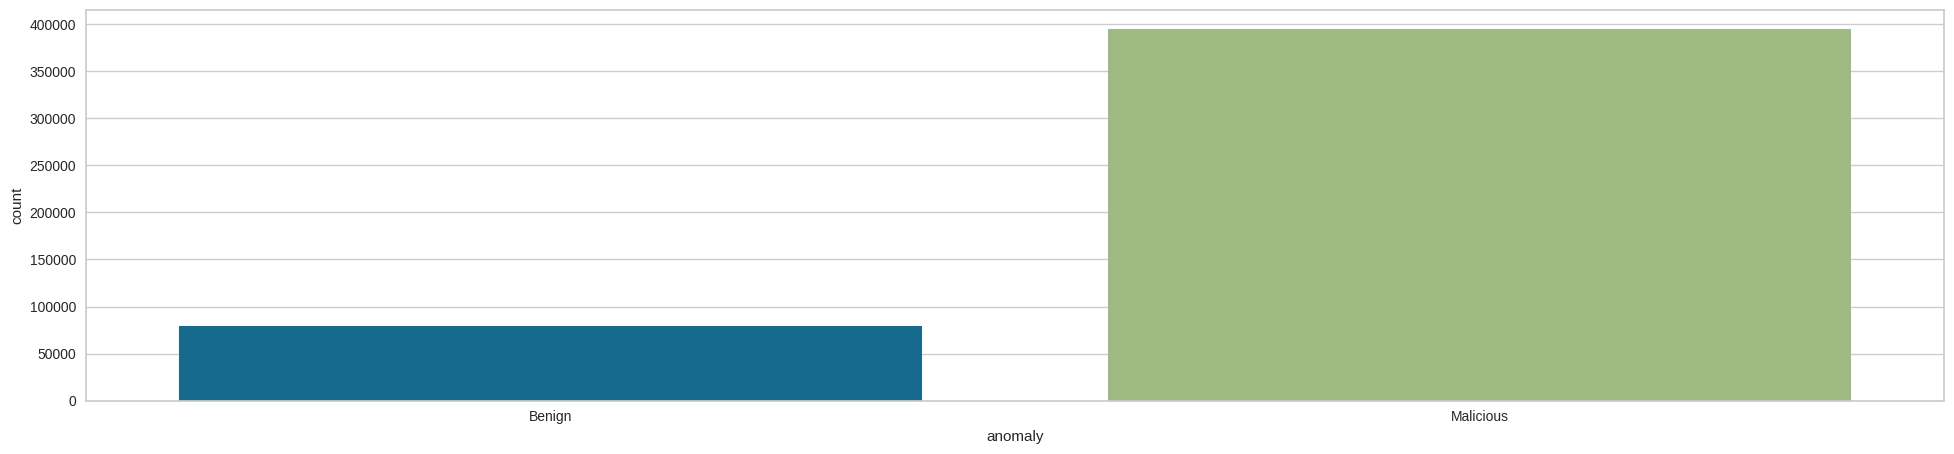

In [55]:
df_malicious = df.filter(pl.col('normality') != 1)
df_benign    = df.filter(pl.col('normality') == 0)

df_count = pl.DataFrame({'anomaly': ['Benign', 'Malicious'], 'count': [df_benign.shape[0], df_malicious.shape[0]]})
sns.barplot(x='anomaly', y='count', hue='anomaly', data=df_count)

print(f'Benign {df_benign.shape[0]} Malicious {df_malicious.shape[0]}')

plt.show()

In [56]:
map_dst_ports = {0:0, 1:0, 5:0,
7:10, 20:20, 21:20, 22:20, 23:20,
25:40, 37:10, 43:10, 53:10, 80:30,
81:50, 82:20, 83:0, 88: 20, 110:40,
119:40, 123:10, 135:10, 137:10, 139:10,
143:40, 161:10, 389:10, 443:30, 444:30, 445:20,
465:30, 500:10, 514:20, 585:40, 587:40, 843:10,
993:40, 995:40}

df = df.with_columns(pl.col('tcp.dstport').replace_strict(map_dst_ports, default=100).alias('tcp.dstport'))

In [57]:
X = df.drop(['frame.number', 'frame.time', 'eth.src', 'ip.src', 'tcp.srcport', 'normality'])
y = df['normality']

In [58]:
y = y.replace({2:1, 3:1, 4:1, 5:1})

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

Acc = 0.9954024673774166 MCC = 0.9833108630814814


<Axes: >

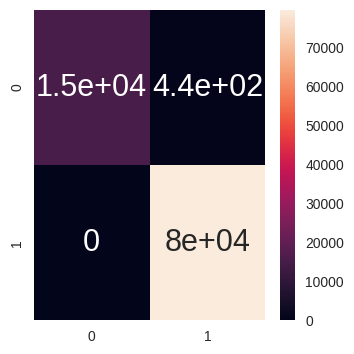

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Acc = {acc} MCC = {mcc}')

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

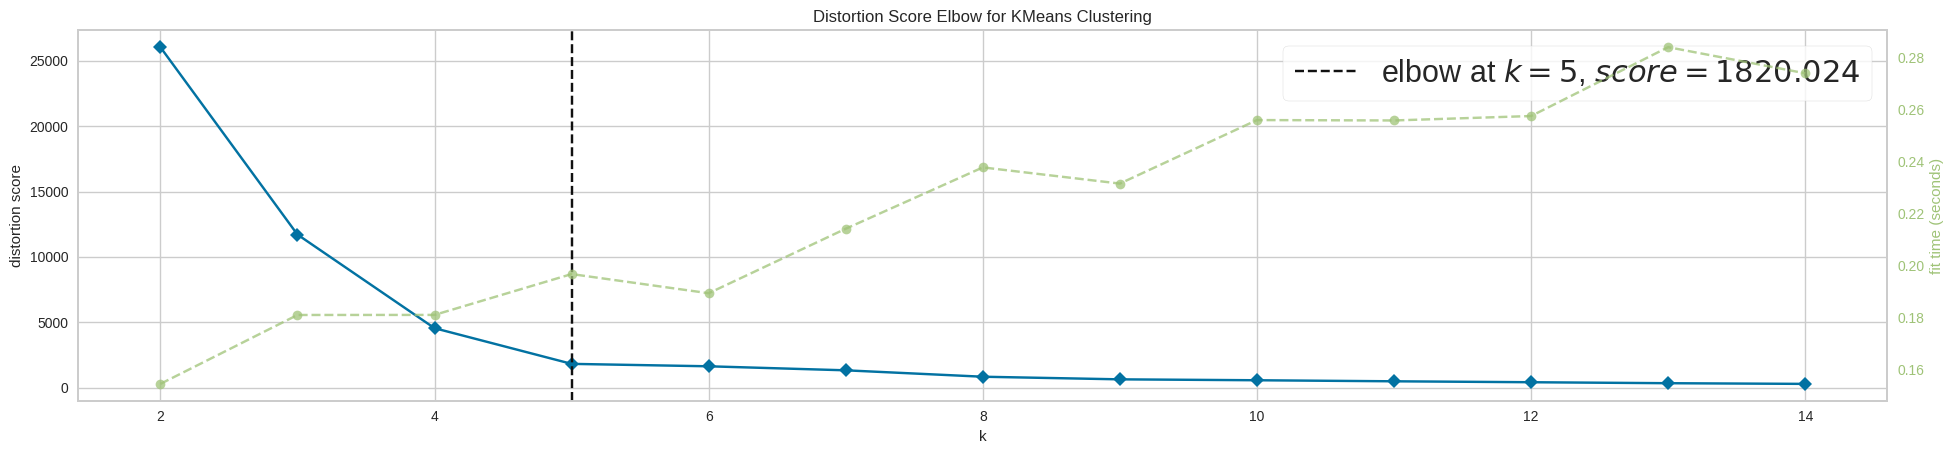

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X_train)
visualizer.show()

In [64]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X_train)
print(model.labels_.shape)

(381940,)


In [65]:
from sklearn.manifold import TSNE

n = int(X_train.shape[0]*.01)
index = np.random.choice(X_train.shape[0], n, replace=False)  
sub_X_train = X_train[index]

tsne = TSNE(n_components=2, n_jobs=-1)
tsne_train_result = tsne.fit_transform(sub_X_train)

In [66]:
n = int(X_test.shape[0]*.01)
index = np.random.choice(X_test.shape[0], n, replace=False)  
sub_X_test = X_test[index]

tsne_test_result = tsne.fit_transform(sub_X_test)

In [67]:
TSNE_train_df = pd.DataFrame(tsne_train_result)
TSNE_train_df['cluster'] = model.predict(sub_X_train)
TSNE_train_df.columns = ['x1','x2','cluster']

In [68]:
TSNE_test_df = pd.DataFrame(tsne_test_result)
TSNE_test_df['cluster'] = model.predict(sub_X_test)
TSNE_test_df.columns = ['x1','x2','cluster']

Text(0.5, 1.0, 'TSNE Test Data')

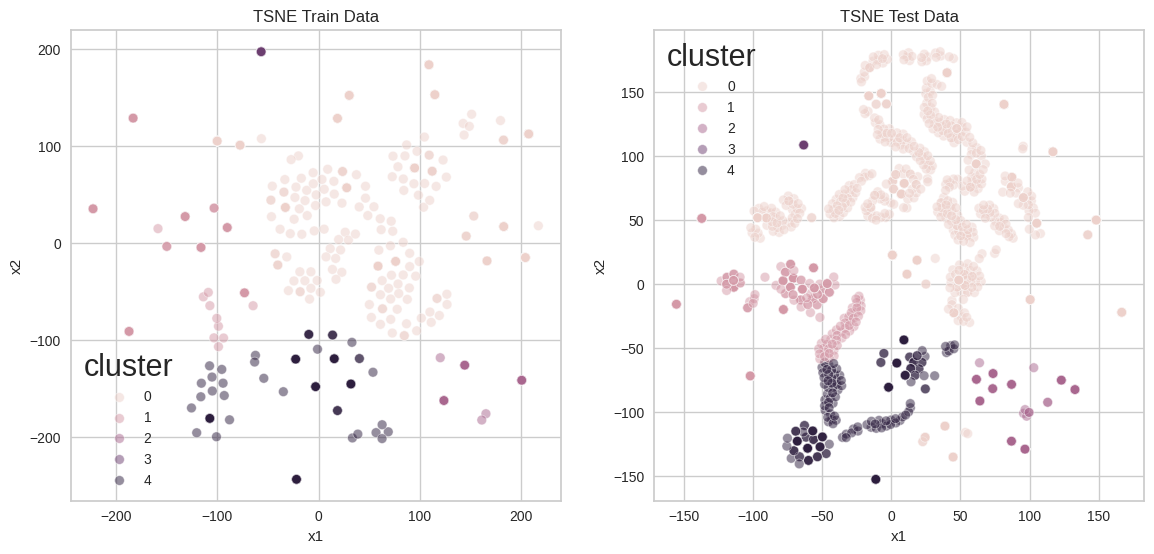

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=TSNE_train_df,x='x1',y='x2', hue='cluster', legend="full", alpha=0.5,ax=ax[1])
sns.scatterplot(data=TSNE_test_df,x='x1',y='x2', hue='cluster', legend="full", alpha=0.5,ax=ax[0])
ax[0].set_title('TSNE Train Data')
ax[1].set_title('TSNE Test Data')

In [70]:
distances = model.transform(X_train)
cluster_indices = model.labels_

mask = (cluster_indices[:, None] == np.arange(distances.shape[1]))
distances[~mask] = 0

dictionary = {i: column for i, column in enumerate(zip(*distances))}


mean_distances = [sum(values) / len(values) for key, values in dictionary.items()]
thresholds = np.array(mean_distances)  # thresholds als NumPy-Array anpassen

print(f'thresholds: {thresholds}')

distances_test = model.transform(X_test)

outliers = np.any(np.array(distances_test) > thresholds, axis=1)  
#print(f'{outliers}')
#print(outliers.shape)
#print(y_test.shape)

(381940, 5)
(381940,)
thresholds: [1.62653344e-02 1.62290036e-02 4.20085046e-03 2.09000372e-08
 1.06531016e-02]


Acc = 0.8344574073686195


<Axes: >

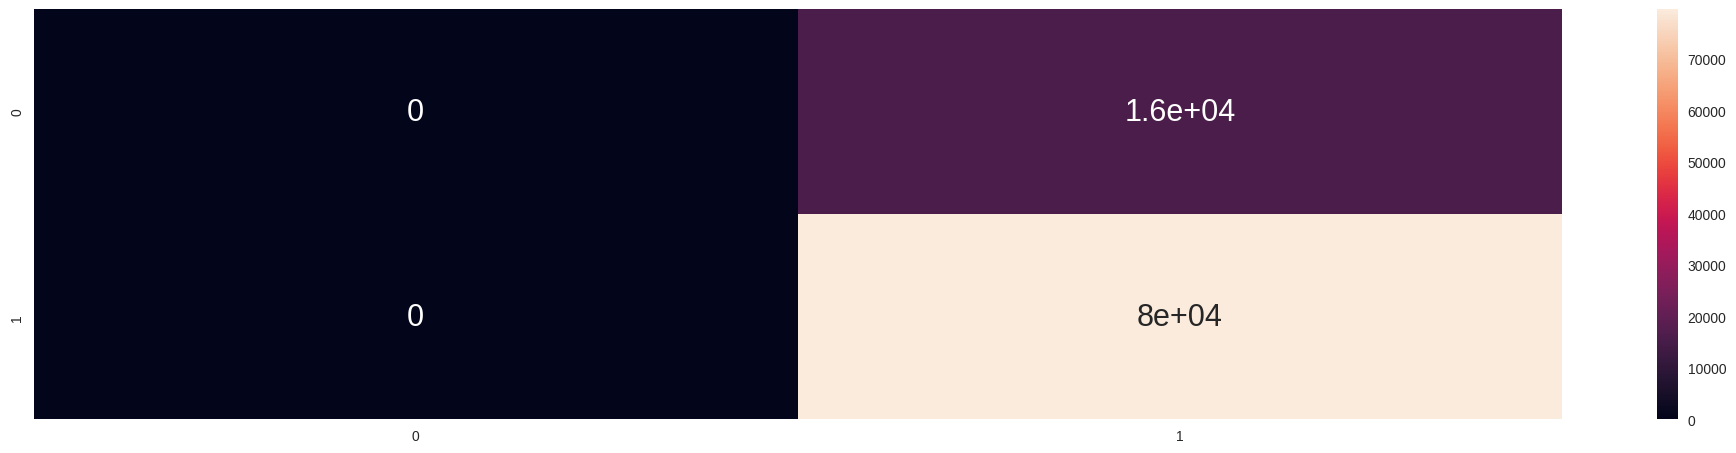

In [76]:
y_pred = [1 if o else 0 for o in outliers]

cf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f'Acc = {acc}')

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [77]:
print(X_train.shape)

(381940, 8)


In [81]:
import os

# This guide can only be run with the jax backend.
os.environ["KERAS_BACKEND"] = "jax"

In [84]:
import keras.backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def isodata(array: np.ndarray) -> float:
    """
    Returns optimal threshold for dividing the sequence of values.

    Args:
        array (np.ndarray): numpy array with the values
    
    Returns:
        float: optimal threshold for dividing the sequence of values
    """
    median = np.median(array)
    previous_median = 0.0 
    
    while median != previous_median:
        median_left = np.median(array[array <= median])
        median_right = np.median(array[array > median])

        previous_median = median
        median = (median_left+median_right) / 2.0

    return median

def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    return 0.6745 * ad / mad

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 8)              │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98 (392.00 B)

 Trainable params: 98 (392.00 B)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 300/300 [01:31<00:00,  3.27epoch/s, loss=0.00435, r2_score=0.562, val_loss=0.00428, val_r2_score=-3.05]

Training time 91.70 seconds


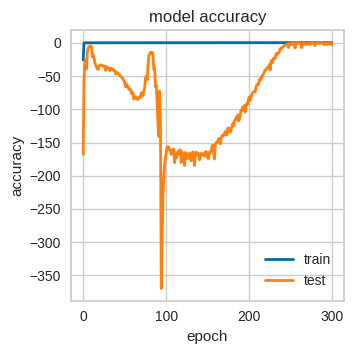

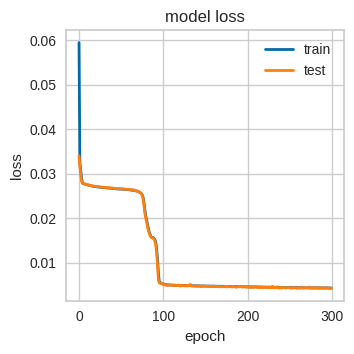

2984/2984 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step


In [105]:
import time
import keras
from tqdm.keras import TqdmCallback

input_dim = X_train.shape[-1]
latent_dim = 2

inputlayer = keras.layers.Input(shape = (input_dim, ))
encoder_00 = keras.layers.Dense(4, kernel_initializer='glorot_uniform', activation='silu')(inputlayer)
#encoder_01 = keras.layers.Dense(3, kernel_initializer='glorot_uniform', activation='silu')(encoder_00)

latent = keras.layers.Dense(latent_dim, kernel_initializer='glorot_uniform', activation='silu')(encoder_00)

#decoder_00 = keras.layers.Dense(3, kernel_initializer='glorot_uniform', activation='silu')(latent)
decoder_01 = keras.layers.Dense(4, kernel_initializer='glorot_uniform', activation='silu')(latent)
outputlayer = keras.layers.Dense(input_dim, kernel_initializer='glorot_uniform', activation='linear')(decoder_01)

autoencoder = keras.Model(inputs = inputlayer, outputs = outputlayer)
autoencoder.compile(optimizer='adam', loss='mae', metrics=['r2_score'])
autoencoder.summary()

start = time.perf_counter()
EPOCHS = 300
BATCH_SIZE = 1024
history = autoencoder.fit(X_train, X_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
validation_data=(X_test, X_test), verbose=0, callbacks=[TqdmCallback(verbose=0)])
stop = time.perf_counter()
elapse_time = stop-start

print(f'Training time {elapse_time:.2f} seconds')

# summarize history for accuracy
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
mae = np.mean(np.abs(X_test - reconstructions), axis=1)

0.83% anomaly
ISO-Data Thr: 0.005423373742324188


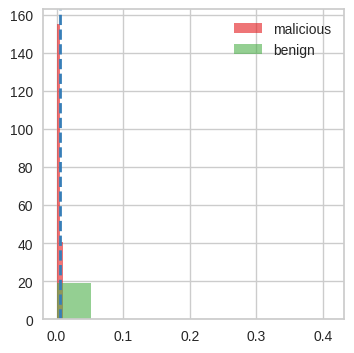

Acc = 0.8372012651069267 MCC = 0.1177672804437081


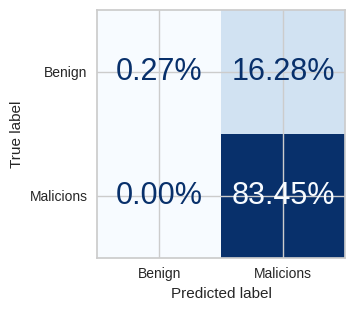

In [106]:
malicious = mae[y_test==1]
benign    = mae[y_test==0]

print(f"{len(malicious)/(len(benign)+len(malicious)):.2}% anomaly")

thr = isodata(mae)
print(f'ISO-Data Thr: {thr}')
y_pred = mse < thr

#fig, ax = plt.subplots(figsize=(6,6))
ax = plt.gca()
ax.hist(malicious, bins=2, density=True, label="malicious", alpha=.6, color=colormap[7])
ax.hist(benign, bins=8, density=True, label="benign", alpha=.6, color=colormap[2])
plt.axvline(x = thr, color = colormap[0], linestyle='--')
#plt.title("(Normalized) Distribution of the Reconstruction Error")
plt.legend()
plt.show()

acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Acc = {acc} MCC = {mcc}')

from sklearn import metrics

cf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix/np.sum(cf_matrix),
display_labels = ['Benign', 'Malicions'])
cm_display.plot(values_format='.2%', colorbar=False, cmap='Blues')
plt.show()